<a href="https://colab.research.google.com/github/seohyeon-jeong/basic_machinelearning/blob/main/SMD_BreamAndSmelt_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### k-nearest neigbors Regression

- 지도학습 알고리즘은 크게 '회귀'와 '분류'로 나뉜다.
  - 회귀 : 두 변수 사이의 상관관계를 분석하는 방법

- k-최근접 이웃 회귀 :  
예측하려는 샘플에 가장 가까운 샘플 k개를 선택하여 이 수치들의 타깃값을 평균하여 예측으로 삼는다.(타깃이 임의의 수치)

- k-최근접 이웃 분류 :  
예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다. (타깃이 클래스)

#### K-NN Regression 모델 구현

In [1]:
# 농어의 길이로 무게 예측
import numpy as np

In [2]:
# 데이터 준비
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

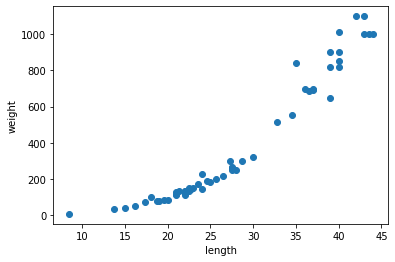

In [4]:
# 산점도로 데이터의 형태 파악
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# perch_length는 1차원 배열 -> train, test set도 1차원 배열 
perch_length.shape

(56,)

In [8]:
# 사이킷런은 2차원 배열만 취급한다. 따라서 1차원 배열을 1개의 열이 있는 2차원 배열로 바꾸어야 한다.
# np.reshape() : 바꾸려는 배열의 크기 지정
train_input = train_input.reshape(-1,1) # 열이 1개인 2차원배열
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
# k-최근접 이웃 회귀 알고리즘을 구현한 클래스
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knr = KNeighborsRegressor() # 클래스 객체 만들기

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [11]:
print(knr.score(test_input, test_target))
# score() : 사이킷런에서는 score()메서드가 출력하는 값은 높을수록 좋다. 정확도, 결정계수등
  # 만약 에러율을 반환하는 경우는 이를 음수로 만들어 줄것

0.9928094061010639


- 회귀 모델에서의 정확도 측정 : Coefficient of determination; R-squared = $R^2$  
회귀에서는 분류와 달리 정확한 숫자를 맞히는 것은 거의 불가능하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다. 따라서 결정계수 $R^2$으로 모델을 평가한다. 예측이 타깃에 아주 가까워지면 분자가 0에 가까워지기 때문에 1에 가까운 값이 된다.  
 $R^2$ = 1 - ${\frac{\Sigma(타깃-예측)^2}{\Sigma(타깃-평균)^2}}$

In [12]:
# 평균절대오차 MAE로 타킷과 예측의 절대값오차를 평균하여 반환하여 타깃과 예측한 값 사이의 차이를 구해보자 (정량적평가)
from sklearn.metrics import mean_absolute_error

In [13]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 결과) 평균 19g정도 타깃값과 다르다고 알 수 있다. 

19.157142857142862


In [14]:
# 훈련한 모델로 훈련세트의 R^2를 반환
print(knr.score(train_input, train_target))
# 결과) 테스트셋으로 모델을 평가한게 훈련셋으로 모델 평가한 것 보다 높다 .99>.96 -> 과소적합

0.9698823289099255


- 과대적합Overfitting : 훈련셋에서 점수가 굉장히 좋았는데 테스트셋에서 점수가 나쁜 경우
    - 원인) 훈련셋에만 잘 맞는 모델이라 테스트 셋이나 새로운 샘플에 대한 예측을 만들때 동작을 잘 하지 않는 경우 
- 과소적합Underfitting : 훈련셋 점수 < 테스트셋 점수 or 두 점수가 모두 다 낮은 경우
    - 원인) 모델이 단순하여 훈련세트에 적절히 훈련되지 않은 경우
    - 원인) 데이터가 적어서 테스트 세트가 훈련 세트의 특징을 다루지 한 경우

In [15]:
# 과소적합을 해결하기 위해 모델의 복잡성을 늘리기 : K-최근접이웃의 알고리즘의 경우는 이웃의 개수를 줄이기 (이웃을 줄이면 국지적인 패턴에 민감해짐)

# 이웃의 개수를 5->3으로 설정
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)
# 훈련셋에 대한 평가
print(knr.score(train_input, train_target))

0.9804899950518966


In [16]:
# 테스트셋에 대한 평가
print(knr.score(test_input, test_target))
# 결과) 테스트셋점수 < 훈련셋점수, 두 점수차이도 적으니 과대적합도 아님 -> OK!

0.974645996398761


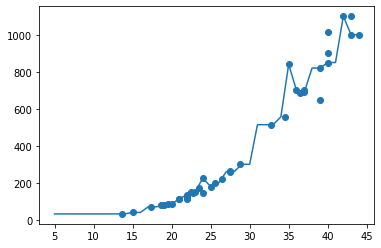

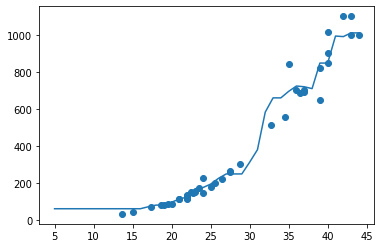

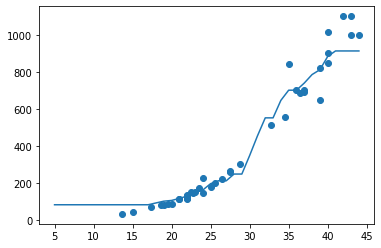

In [17]:
# k-최근접 이웃 회귀 모델의 k값을 1, 5, 10으로 해서 훈련 + 농어의 길이를 5에서 45까지 바꾸어가며 예측을 만들어 그래프로 그려보기 

knr = KNeighborsRegressor()

# 농어의 길이 5부터 45까지, 2차원 넘파이배열로
x = np.arange(5,45).reshape(-1,1) 

# 이웃의 크기 k = 1, 5, 10일때 예측 결과 그래프로 나타내기
for n in [1,5,10]:
  knr.n_neighbors = n # 이웃의 크기가 1,5,10인 경우 
  knr.fit(train_input,train_target) # 기존의 모델 학습

  # 지정된 범위 x에 대한 예측을 구하라
  prediction = knr.predict(x) # 해당 범위의 값에 대한 예측

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.show()

#### K-NN Regression의 한계  
훈련셋 범위 밖의 샘플을 예측할 수 없다.  
K-NN 회귀는 아무리 멀리 떨어져 있더라도 무조건 가장 가까운 샘플의 타깃을 평균하여 예측하기 때문

In [18]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]])) # 길이가 50cm인 농어의 무게 예측 : 1033g BUT 실제는 더 나간다고한다! 

[1033.33333333]


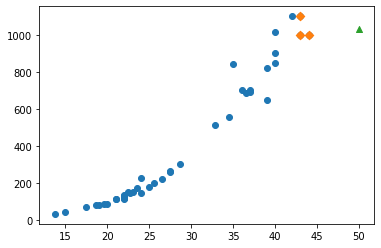

In [21]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃구하기
distance, indexes = knr.kneighbors([[50]])

# 훈련셋의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련셋 중에서 이웃샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

# 결과) 길이가 커질수록 농어의 무게 증가하는 경향이 있다. 하지만 50cm 농어에서 가까운건 45cm근방!
# K-NN의 한계) 새로운 샘플이 훈련셋의 범위를 벗어나면 엉뚱한 값을 예측! 

In [22]:
# 이웃 샘플의 타깃의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [23]:
# 농어가 100cm여도 45cm대의 무게의 평균을 반환한다
print(knr.predict([[100]]))

[1033.33333333]


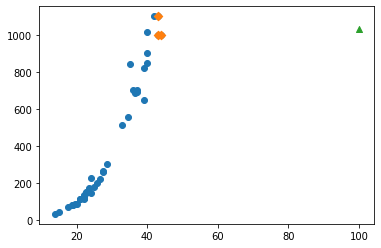

In [24]:
# 100cm의 농어들의 이웃을 구한다
distance, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.show()

In [25]:
# 머신러닝 모델은 한 번 만들고 끝나는 프로그램이 아니다.
# 시간과 환경이 변화면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 한다.

### 선형 회귀 Linear Regression  

- 모델 기반 학습 : 최적의 모델 파라미터를 찾는 알고리즘 훈련과정 (선형 회귀 등)
  - 모델 파라미터model parameter : 머신러닝 알고리즘이 찾은 값으로 기울기(=가중치weight, 계수coefficient)와 절편의 값
    - 머신러닝에서 가중치는 기울기와 절편 모두를 의미하는 경우가 많다.
- 사례 기반 학습 : 훈련세트를 저장하는게 훈련의 전부 (K-NN등)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 이런 모델클래스를 '추정기estimator'라고 한다.

# fit_intercept 매개변수를 True로 지정하면 절편을 학습하지 않는다. 디폴트 True

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [27]:
# lr.coef_ , lr.intercept_ : 모델 파라미터 model parameter
# 학습된 모델의 coef_속성은 특성에 대한 계수를 포함한 배열이므로 이 배열의 크기 = 특성의 개수
# 학습된 모델의 intercept_ 속성에는 절편이 저장되어 있다

print(lr.coef_, lr.intercept_) # 계수, 절편

[39.01714496] -709.0186449535477


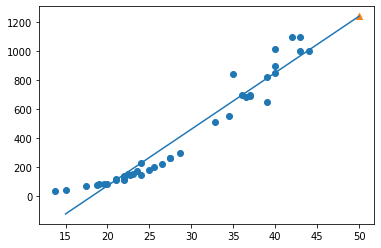

In [28]:
# 훈련셋의 산점도
plt.scatter(train_input, train_target)

# 농어의 길이 15에서 50까지 1차 방정식 그래프 : (15, 15*39-709)와 (50, 50*39-709) 두 점 잇기
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [29]:
print(lr.score(train_input, train_target)) # 훈련셋 스코어
print(lr.score(test_input, test_target)) # 테스트셋 스코어

# 결과) 훈련셋스코어 > 테스트셋 스코어 : 과대적합? 하지만 훈련셋의 점수도 낮은 편이다 오히려 과소적합된걸지도?
#      그래프를 보면 일진선이기보다 조금 구부러진 곡선이다. 따라서 최적의 직선보다는 최적의 곡선 모델이 더 적합할 수 있다.

0.9398463339976039
0.8247503123313558


### 다항 회귀 Polynomial Regression

In [30]:
# 2차 방정식의 그래프 : 제곱항이 필요하다
# 2차항을 다른 변수로 치환하면 선형회귀의 모습이기 때문에 선형 회귀로 취급해도 무관

# 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다. 특성값만 변경.
 
# 원래 특성인 길이를 제곱하여 왼쪽 열에 추가 -> 열이 두개로 늘어남
train_poly = np.column_stack((train_input**2, train_input)) # 넘파이 브로드캐스팅 적용됨
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [31]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [32]:
print(lr.coef_, lr.intercept_)
# 결과) 다항 회귀 모델 : 무게 = 1.01*길이^2 - 21.6*길이 + 116.05

[  1.01433211 -21.55792498] 116.05021078278276


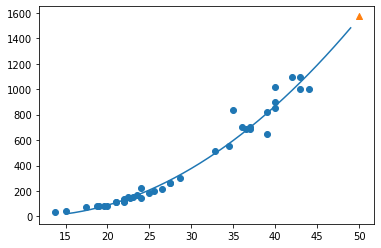

In [33]:
# 구간별 직선을 그리기 위해서 15에서 49까지 정수 배열을 마든다.
point = np.arange(15,50)

# 훈련셋의 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식의 그래프를 그린다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [34]:
# 모델 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 결과) 훈련셋결과 < 테스트셋결과 -> 과소적합이 남아있음

0.9706807451768623
0.9775935108325122


### 다중 회귀 Multiple Regression
여러 개의 특성을 사용한 선형 회귀

cf. 특성 공학feature engineering : 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업  

- 판다스Pandas : 데이터 분석 라이브러리

In [35]:
# 농어 데이터 받아오기 (length, height, width)
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv') # 데이터 프레임 생성

# df.to_numpy() : 데이터 프레임을 넘파일배열로 
perch_full = df.to_numpy() 
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [36]:
# 타깃(weight) 데이터는 이전 데이터 사용
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)

In [37]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [38]:
# 변환기transformer : 사이킷런에서 특성을 만들거나 전처리하기 위한 다양한 클래스
from sklearn.preprocessing import PolynomialFeatures

In [39]:
"""
PolynomialFeatures 클래스 : 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.
2, 3 -> 4, 9 (각각 제곱한 값), 6(둘을 곱한 값), 1(선형방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 본다)
# degree = K : 디폴트가 2
# interaction_only = True이면 거듭제곱항을 제외, 특성간의 곱셈 항만 추가된다. (False가 디폴트)
# include_bias = False로 지정해줄 것 (True가 디폴트) 
# 사실 사이킷런 모델은 자동으로 특성에 추가된 절편항 무시하지만 혼돈을 피하기 위해 지정

# fit() : 새롭게 만들 특성 조합을 찾기
# transform()는 실제로 데이터를 변환. fit()으로 훈련을 해야지만 transform()할 수 있다.
"""

poly = PolynomialFeatures() 
poly.fit([[2,3]])
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]


In [40]:
# 다만, 사이킷런의 선형모델은 자동으로 절편을 추가하므로 만들 필요가 없다
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform(([[2,3]])))

[[2. 3. 4. 6. 9.]]


In [41]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [42]:
# poly.get_feature_names() : 각 poly객체의 특성들이 각각 어떤 입력의 조합으로 만들어줬는지 보여줌
poly.get_feature_names()

# 결과) x0 : 첫번째 특성을 의미

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [43]:
# poly.fit(train_input) : 훈련은 훈련데이터셋으로 하고, 테스트셋을 그걸로 변환 ~ 항상 훈련셋을 기준으로 테스트셋 변환
test_poly = poly.transform(test_input)

In [44]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 결과) 과소적합 문제 해결

0.9903183436982124
0.9714559911594132


In [45]:
# PolynomialFeatures 클래스의 degree 매개변수를 이용 필요한 고차항의 최대 차수 지정가능
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [46]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 결과) 과대적합 : 특성의 개수를 크게 늘리면 훈련셋에 대해선 완벽한 학습모델이 되지만, 과대적합으로 실제로는 쓸모없는 모델이 된다.

0.9999999999991096
-144.40579242335605


In [47]:
# 규제Regularization : 머신러닝 모델이 훈련셋을 과도하게 학습하지 못하도록 훼방하는 것 = 과대적합을 막는 것
# 사전 과제 : 특성의 스케일의 정규 (평균과 표준편차를 직접구해서 특성을 표준점수로 바꾸기 등)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
# 훈련셋에서 학습한 평균과 표준편차는 StandardScaler 클래스 객체의 mean_, scale_속성에 저장된다.

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀 Lidge Regression
선형 회귀 모형에서 계수를 제곱한 값을 기준으로 규제를 적용한 모델.  
- 축소방법shrinkage method 중 하나로, 모형에 분산을 줄여주는 효과를 가져온다

- 새로운 설명 변수를 추가함에 있어서 과적합을 방지하기 위해 OLS(Ordinary Least Square:최소제곱법) 또는 MLE(Maximum likelihood estimation:최대우도추정)를 이용한 계수추정치를 찾는 과정에서 패널티 항으로 L2-norm을 부여하는 방법=규제.  
- 계수의 크기를 줄이지만 라쏘처럼 아예 0으로 만들순 없다.

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge() 
'''
# alpha 매개변수로 규제의 강도 조절가능 (디폴트=1)
  -> alpha가 크면 규제강도가 세지므로 계수값이 줄어들어 과소적합을 유도
  # 하이퍼파라미터hyperparameter: 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터. 
# solver 매개변수에 최적의 모델을 찾기 위한 방법 지정 가능 (디폴트=auto)
# sag()와 이의 개선버전인 saga()는 확률적 평균 경사하강법 알고리즘으로 특성과 샘플 수가 많을 때 성능이 빠르고 좋다.
  # 사용시 random_state= 지정가능
'''

ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 결과) 많은 특성을 사용했음에도 과대적합되지 않아 테스트셋에도 좋은 성능을 보임

0.9896101671037343
0.9790693977615398


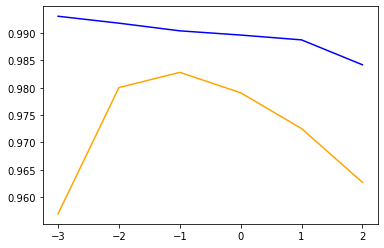

In [55]:
# 적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R^2값의 그래프를 그려보는 것
# -> 훈련셋과 테스트셋의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.

import matplotlib.pyplot as plt

# alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트 
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 생성
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해서 로그함수로 바꾸어 지수로 표현
# np.log() : 자연상수 e를 밑으로 하는 자연로그
# np.log10() : 10을 밑으로 하는 상용로그
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='orange')
plt.show()

# 결과) 두 그래프가 가장 가깝고 테스트셋의 점수가 가장높은 -1, 
#      본래의 값으로 변환하면 즉, 10^(-1) = -0.1이 적절한 alpha값이 된다

In [57]:
# 최종모델 작성 with alpha = .1
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 결과) 훈련셋과 테스트셋의 점수가 비슷하게 높고, 과소적합과 과대적합사이에서 균형을 이르고 있다 -> Good!

0.9903815817570366
0.9827976465386927


### 라쏘 회귀 Lasso Regression
OLS혹은 MLE를 이용한 계수추정치를 찾는 과정에서 penalty를 L1-norm으로 부여한 회귀

- 제한함수의 차이로 인하여 라쏘모형은 계수추정치가 수축됨에 있어 0이 될 수 있어 변수선택의 효과도 가지지만 , 능형회귀 모형은 계수추정치가 수축됨에 있어 0으로 만들지 않는다

In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso()
# Lasso() 클래스는 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행하는 좌표하강법coordinate descent를 사용

lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
# 결과) 훈련셋 스코어 > 테스트셋스코어 + 매우 좋은 점수 

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


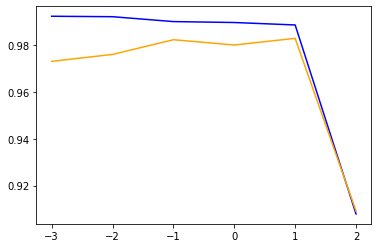

In [61]:
# 최적의 alpha찾기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # The max_iter value is to limit the number of cycles we're willing to run. 
  # 사이킷런의 라쏘모델은 최적의 계수를 찾기 위해 반복적인 계산을 한다. 반복횟수를 충분히 늘리기 위해서 max_iter 매개변수 값을 10000으로 지정
  
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='orange')

# 결과) 훈련 데이터에 과대적합 -> 적정(1) -> 과소적합(테스트셋 점수 > 훈련셋 점수) 

In [62]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [63]:
# 라쏘 모델은 계수값을 아예 0으로 만들수 있다 -> 특성을 골라내는 용도로도 사용가능
print(np.sum(lasso.coef_==0)) 
# 결과) 40 : 55개의 특성을 모델에 주입했지만, 라쏘 모델에 사용한 특성은 55-40=15개뿐!

# np.sum() : 배열을 모두 더한 값
# 넘파이 배열에 비교연산자 사용시 True : 1, False :0로 인식하여 연산

40
